Regressão Linear Multivariada:

### Apresente os dados utilizados, descrevendo o objetivo da análise e as variáveis de interesse.

O objetivo é predizer o ano com base nas populações usando a regressão linear múltipla.
Serão apresentados a variação das populações de alguns países e então o algorítimo vai predizer o ano.

Primeiro será feita um treino com 10 países, será observado que alguns países tem uma forte correlação com a sua população, então serão retirados 3 países e será feito um novo treinamento onde observamos uma melhora.

O dataset contem informações de vários países e suas populações ao longo do tempo e são apresentados no seguinte formato:

![imagem do dataset](./datasets/vW6J0k9.png)

Carrega o dataset da população mundial adquirido no link:
https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset/data

In [268]:
import pandas as pd

file = "./datasets/world_population.csv"
data_csv = pd.read_csv(file)

Seleciona os países que serão usados como variáveis independentes.

In [269]:
def get_countries(index=0) -> list:
    countries = [
        ["NIU", "FLK", "MSR", "SPM", "BLM", "TUV", "WLF"],
        ["VAT", "TKL", "NIU", "FLK", "MSR", "SPM", "BLM", "TUV", "WLF", "NRU"],
    ]
    return countries[index]


countries = get_countries(index=1)

Seleciona as populações dos países.

In [270]:
def get_population_data(
    dataset: pd, countries: list[str]
) -> tuple[list[dict], list[int]]:

    populations = []
    for country in countries:
        values = dataset[dataset["CCA3"] == country].values.flatten()
        populations.append(
            {
                "label": values[2],
                "population": values[5:13].astype(float) / 1e3,
            }
        )
    years = [2022, 2020, 2015, 2010, 2000, 1990, 1980, 1970]
    return populations, years


populations, years = get_population_data(data_csv, countries)

### Apresente o gráfico de dispersão entre as variáveis dependentes e a variável independente para cada variável de interesse.

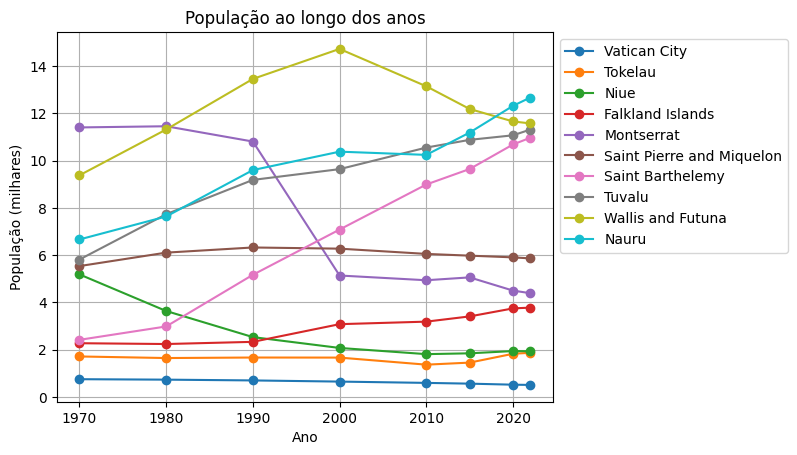

In [271]:
import matplotlib.pyplot as plt


def plot_population_over_years(populations, years):
    """
    Plota a população ao longo dos anos para diferentes países.

    Args:
    - populations (list): Lista de dicionários contendo os dados de população.
    - years (list): Lista de anos.

    """
    plt.figure()
    for population in populations:
        plt.plot(
            years,
            population["population"],
            marker="o",
            label=population["label"],
        )
    plt.title("População ao longo dos anos")
    plt.xlabel("Ano")
    plt.ylabel("População (milhares)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()


plot_population_over_years(populations, years)

Faz uma normalizações dos dados para deixar todas na mesma escala.

In [272]:
def normalize_population_data(populations):
    """
    Normaliza os dados de população para cada país na lista de populações.

    Args:
    - populations (list): Lista de dicionários contendo os dados de população.

    Returns:
    - list: Lista de dicionários com os dados de população normalizados.
    """
    for population in populations:
        data = population["population"]
        min_val = data.min()
        max_val = data.max()
        normalized = (data - min_val) / (max_val - min_val)
        population["normalized"] = normalized
        population["min"] = min_val
        population["max"] = max_val
    return populations


populations = normalize_population_data(populations)

### Apresente o gráfico de dispersão entre as variáveis dependentes e a variável independente para cada variável de interesse.
Agora o gráfico é referente as mesmas variável do plot anterior, mas agora em escala normalizada entre 0 e 1.

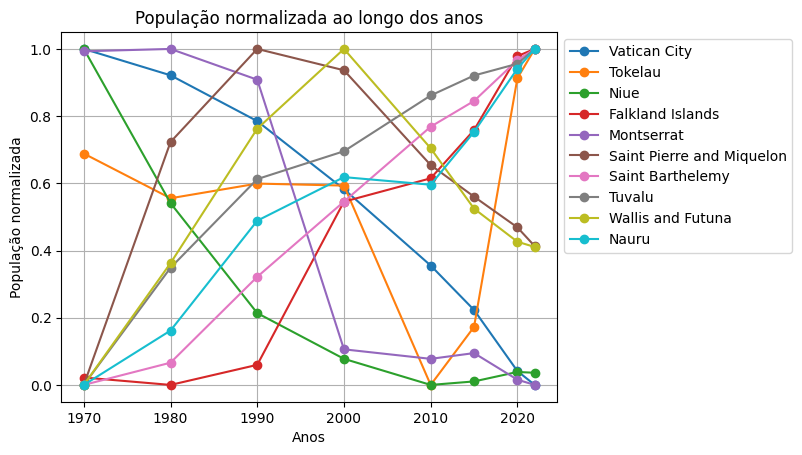

In [273]:
import matplotlib.pyplot as plt


def plot_normalized_population_over_years(populations, years):
    """
    Plota a população normalizada ao longo dos anos para diferentes países.

    Args:
    - populations (list): Lista de dicionários contendo os dados de população normalizados.
    - years (list): Lista de anos.
    """
    plt.figure()
    for population in populations:
        plt.plot(
            years,
            population["normalized"],
            marker="o",
            label=population["label"],
        )
    plt.title("População normalizada ao longo dos anos")
    plt.xlabel("Anos")
    plt.ylabel("População normalizada")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()


plot_normalized_population_over_years(populations, years)

Prepara um dataframe com a população normalizada.

In [274]:
import pandas as pd


def create_normalized_dataframe(populations):
    """
    Cria um DataFrame com as populações normalizadas.

    Args:
    - populations (list): Lista de dicionários contendo os dados de população normalizados.

    Returns:
    - DataFrame: DataFrame com as populações normalizadas.
    """
    df_normalized = pd.DataFrame()

    # Criar um DataFrame com as populações normalizadas
    for population in populations:
        df_normalized[population["label"]] = population["normalized"]

    return df_normalized


df_normalized = create_normalized_dataframe(populations)

Separa o dados para treino e teste

In [275]:
from sklearn.model_selection import train_test_split
import numpy as np


def split_data(
    df_normalized: pd.DataFrame,
    years: list,
    test_size: float = 0.2,
    random_state: int = 42,
):
    """
    Divide os dados em conjuntos de treino e teste.

    Args:
    - df_normalized (pd.DataFrame): DataFrame com as populações normalizadas.
    - years (list): Lista de anos.
    - test_size (float): Proporção do conjunto de dados a ser usado como conjunto de teste.
    - random_state (int): Semente para o gerador de números aleatórios.

    Returns:
    - Tuple: Conjuntos de treino e teste para X e Y.
    """
    X = df_normalized
    Y = np.array(years)

    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state
    )

    return X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = split_data(df_normalized, years)

### Obtenha os parâmetros do modelo e estime a nova variável dependente.

In [276]:
from sklearn.linear_model import LinearRegression
import numpy as np


def linear_regression_model(
    X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray
) -> np.ndarray:
    """
    Cria e treina um modelo de regressão linear e faz previsões nos dados de teste.

    Args:
    - X_train (np.ndarray): Conjunto de treino das variáveis independentes.
    - Y_train (np.ndarray): Conjunto de treino da variável dependente.
    - X_test (np.ndarray): Conjunto de teste das variáveis independentes.

    Returns:
    - np.ndarray: Valores preditos para o conjunto de teste.
    """
    # Criar o modelo de regressão linear
    regr = LinearRegression()
    regr.fit(X_train, Y_train)

    # Predizer os valores
    Y_pred = regr.predict(X_test)

    return Y_pred


Y_pred = linear_regression_model(X_train, Y_train, X_test)

np.set_printoptions(precision=1)
print(f"Valores esperados: {Y_test}")
print(f"Valores preditos: {Y_pred}")

Valores esperados: [2020 1990]
Valores preditos: [2020.2 1990.8]


### Qual a raiz do erro médio quadrático (RMSE) e o coeficiente de determinação (R-square) obtidos para o modelo estimado nos dados de treinamento e de teste?

Define as funções para calcular as métrica

In [277]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    root_mean_squared_error,
)

def calculate_metrics(y_true, y_pred) -> tuple[float, float, float, float]:
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    return r2, mae, mse, rmse


# Calcular as métricas
r2, mae, mse, rmse = calculate_metrics(Y_test, Y_pred)

In [278]:
def print_metrics(r2=None, mae=None, mse=None, rmse=None):
    print(f"MAE: {mae:.4f}") if mae is not None else None
    print(f"MSE: {mse:.4f}") if mse is not None else None
    print(f"RMSE: {rmse:.4f}") if rmse is not None else None
    print(f"Coeficiente de determinação R²: {r2:.4f}") if r2 is not None else None


# Imprimir as métricas
print_metrics(r2=r2, rmse=rmse)

RMSE: 0.6030
Coeficiente de determinação R²: 0.9984


### Desenhe um mapa de calor contendo a matriz de correlação (Pearson correlation coefficient) entre todas as variáveis

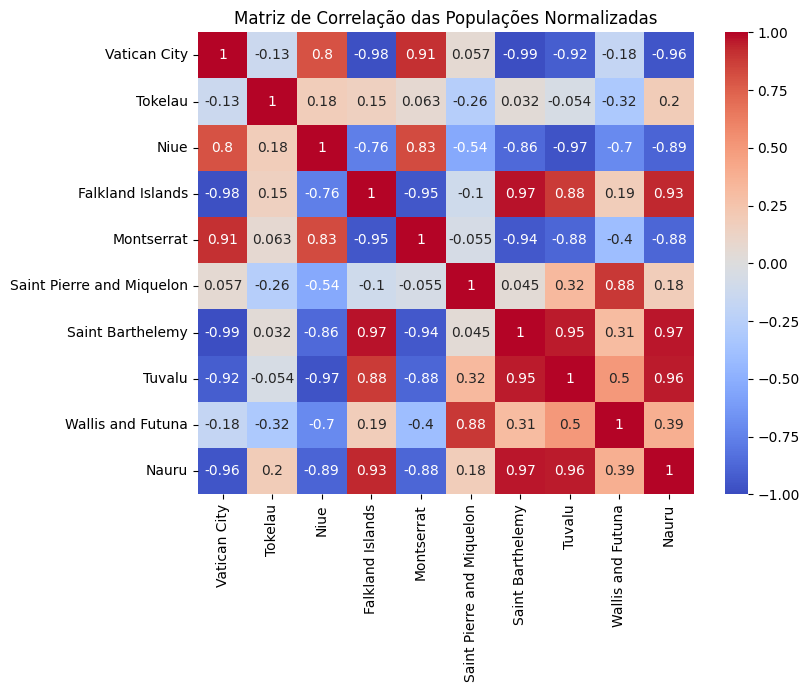

In [279]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_correlation_matrix(
    df_normalized: pd.DataFrame,
    title: str = "Matriz de Correlação das Populações Normalizadas",
):
    """
    Calcula e plota a matriz de correlação das populações normalizadas.

    Args:
    - df_normalized (pd.DataFrame): DataFrame com as populações normalizadas.
    - title (str): Título do gráfico.
    """
    # Calcular a matriz de correlação
    correlation_matrix = df_normalized.corr()

    # Plotar a matriz de correlação
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(title)
    plt.show()


plot_correlation_matrix(df_normalized)

### Calcule o VIF

In [280]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula o VIF (Variance Inflation Factor) para cada variável em um DataFrame.

    Args:
    - data (pd.DataFrame): DataFrame contendo as variáveis independentes e a variável dependente.
    - target_column (str): Nome da coluna da variável dependente que será removida antes do cálculo do VIF.

    Returns:
    - pd.DataFrame: DataFrame contendo os valores de VIF para cada variável independente.
    """

    # Inicializar o DataFrame para armazenar os valores de VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns

    # Calcular o VIF para cada variável independente
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                    for i in range(len(data.columns))]
    return vif_data

vif_data = calculate_vif(df_normalized)
print(vif_data)


                     feature  VIF
0               Vatican City  inf
1                    Tokelau  inf
2                       Niue  inf
3           Falkland Islands  inf
4                 Montserrat  inf
5  Saint Pierre and Miquelon  inf
6           Saint Barthelemy  inf
7                     Tuvalu  inf
8          Wallis and Futuna  inf
9                      Nauru  inf


/home/guse/pos-graduação-2024/SIGAA/APM20242 - APRENDIZADO DE MÁQUINA (2024 .2 - T01)/.venv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Exclua variáveis e obtenha os parâmetros do modelo e estime a nova variável dependente.

Retirado 3 países: Vatican City, Tokelau e Nauru da lista de países. Este eram os países com maior correlação entre eles.

In [281]:
countries = get_countries(index=0)
populations, years = get_population_data(data_csv, countries)

In [282]:
# plot_population_over_years(populations, years)

Normaliza o novo conjunto de populações

In [283]:
populations = normalize_population_data(populations)

In [284]:
# plot_normalized_population_over_years(populations, years)

Cria um dataframe com a população normalizada

In [285]:
df_normalized = create_normalized_dataframe(populations)

Estima a nova variável dependente

In [286]:
X_train, X_test, Y_train, Y_test = split_data(df_normalized, years)
Y_pred = linear_regression_model(X_train, Y_train, X_test)

In [287]:
np.set_printoptions(precision=1)
print(f"Valores esperados: {Y_test}")
print(f"Valores preditos: {Y_pred}")

Valores esperados: [2020 1990]
Valores preditos: [2020.3 1990.4]


### Qual a raiz do erro médio quadrático (RMSE) e o coeficiente de determinação (R-square) obtidos para o modelo estimado nos dados de treinamento e de teste? Obteve melhora?
O valor de RMSE de 0.3473 foi menor, comparado com o RMSE de 0.6030 do treino anterior.
O valor do coeficiente de determinação de 0.9995 foi melhor quando comparado ao treino anterior de 0.9984.


In [288]:
# Calcular as métricas
r2, mae, mse, rmse = calculate_metrics(Y_test, Y_pred)
# Imprimir as métricas
print_metrics(r2=r2, rmse=rmse)

RMSE: 0.3473
Coeficiente de determinação R²: 0.9995


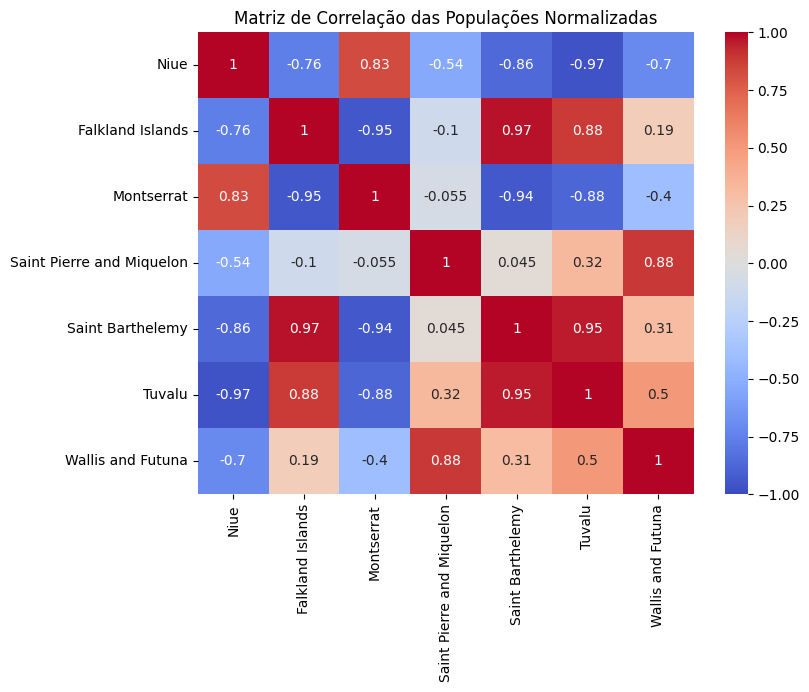

In [289]:
plot_correlation_matrix(df_normalized)

In [290]:
vif_data = calculate_vif(df_normalized)
print(vif_data)


                     feature          VIF
0                       Niue   191.834901
1           Falkland Islands  1052.272484
2                 Montserrat   384.897194
3  Saint Pierre and Miquelon  2236.191339
4           Saint Barthelemy  6714.140203
5                     Tuvalu  4855.102088
6          Wallis and Futuna   777.205387
